<img src='assets/flu_shot.png' width=900>

## Постановка задачи
В этом домашнем задании мы поучаствуем с вами в настоящем соревновании по анализу данных. Соревнование открытое -- всегда сможете вернуться к своему результату, чтобы попробовать его улучшить.

Во всех подробностях ознакомится с соревнованием можно по [**этой ссылке**](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/).

В этом соревновании совместно с Национальным центром статистики здравоохранения США была собрана база данных, в которой респондентов опрашивали по телефону, вакинировались ли они от сезонного гриппа и от гриппа H1N1 ("свинной грипп"). 

По данным того, как отвечали респонденты, необходимо будет предсказать **две** целевые переменные:

- `h1n1_vaccine` - вакцинировался ли респондент от гриппа H1N1
- `seasonal_vaccine` - вакционировался ли респондент от сезонного гриппа.
Каждая из этих меток может принимать только одного из значений, либо 0 = "нет", либо 1 = "да" (некоторые респонденты могли  вакцинироваться два раза, некоторые только один раз, а некоторые ни одного). Задача классификации, когда необходимо прдсказывать сразу несколько меток класса называется "мультилейбловой классификацией".

Подробное описание задачи представлено на [этой странице](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#features_list).

## План действий:

Во всех прошлых домашних заданиях я давал подробные инструкции по тому, что именно и в какой последовательности делать. Это домашнее задание будет отличаться тем, что ниже будет приведён только общий план действий. А реализацию кода я оставляю за вами. Добавляйте необходимое количество ячеек ниже по пунктам.

### Список обязательных действий

# Загрузка и первичная подготовка данных
1. Присоединитесь к соревнованию и скачайте тренировочную и тестовую выборки с официального сайта (1 балл).

2. Загрузите данные тренировочной выборки в датафрейм, разделите матрицу предикторов и целевые переменные на `X` и `Y` (1 балл).

3.  Обучающую часть выборки (для которой известны истинные метки классов) разделите на тренировочную и тестовую часть в соотношении 80:20 (1 балл).


`### Do not modify this cell`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test_features = pd.read_csv("test_set_features.csv")
train_features = pd.read_csv("training_set_features.csv")
train_labels = pd.read_csv("training_set_labels.csv")

# Исследовательский анализ данных

4. Проведите первичный анализ данных для тренировочной части выборки (3 балла):
    - исследуйте, сбалансированы ли целевые переменные;
    - какие предикторы связаны с целевой переменной;
    
    Кстати, неплохой Exploratory data analysis приведён в данном [**блоге DrivenData**](https://drivendata.co/blog/predict-flu-vaccine-data-benchmark/)


`### Do not modify this cell`

In [3]:
train_labels.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [4]:
train_labels['h1n1_vaccine'].value_counts()
#целевая переменная не сбаланирована

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

In [5]:
train_labels['seasonal_vaccine'].value_counts()
#целевую переменную можно считать сбалансированной

seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64

In [6]:
train_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [7]:
data_factorized = pd.merge(train_features, train_labels)
cat_columns = data_factorized.select_dtypes(['object']).columns
data_factorized[cat_columns] = data_factorized[cat_columns].apply(lambda x: pd.factorize (x, use_na_sentinel=False)[0])
data_factorized.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0.0,0.0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,1,1,1,0.0,0.0,1,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,2,1,2.0,0.0,2,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,3,2,0.0,0.0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,1,2,1,1.0,0.0,3,3,0,0


<Axes: >

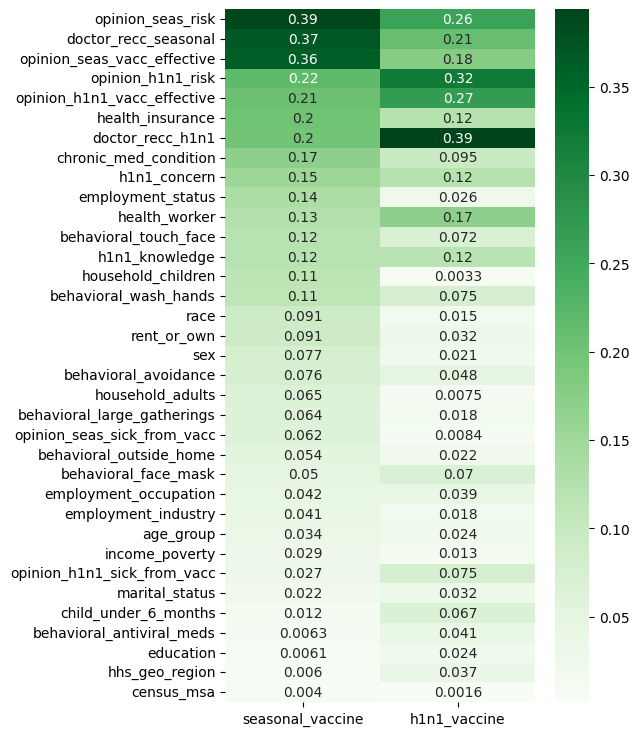

In [8]:
target_cols = ['seasonal_vaccine','h1n1_vaccine']
plt.figure(figsize=(5,9))
correlation_matrix = np.abs(data_factorized.iloc[:,1:].corr()[target_cols].iloc[:-2]).sort_values(by=target_cols,
                                                                                       ascending=False)
sns.heatmap(correlation_matrix, cmap='Greens', annot=True)

In [9]:
correlation_matrix

,seasonal_vaccine,h1n1_vaccine
opinion_seas_risk,0.390106,0.258571
doctor_recc_seasonal,0.369190,0.209864
opinion_seas_vacc_effective,0.361875,0.179272
opinion_h1n1_risk,0.216625,0.323265
opinion_h1n1_vacc_effective,0.205072,0.269347
health_insurance,0.200858,0.121170
doctor_recc_h1n1,0.198607,0.393890
chronic_med_condition,0.170174,0.095207
h1n1_concern,0.154828,0.121929
employment_status,0.135697,0.025899


In [10]:
def feature_importance(correlation_matrix, threshold=0.025):
    mask = (correlation_matrix.h1n1_vaccine > 
            threshold)|(correlation_matrix.seasonal_vaccine > threshold)
    important_features = correlation_matrix[mask].index
    return important_features

In [11]:
print('Количество показательных признаков:', feature_importance(correlation_matrix).size)
print('Подходящие признаки: ',  feature_importance(correlation_matrix))

Количество показательных признаков: 33
Подходящие признаки:  Index(['opinion_seas_risk', 'doctor_recc_seasonal',
       'opinion_seas_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_vacc_effective', 'health_insurance', 'doctor_recc_h1n1',
       'chronic_med_condition', 'h1n1_concern', 'employment_status',
       'health_worker', 'behavioral_touch_face', 'h1n1_knowledge',
       'household_children', 'behavioral_wash_hands', 'race', 'rent_or_own',
       'sex', 'behavioral_avoidance', 'household_adults',
       'behavioral_large_gatherings', 'opinion_seas_sick_from_vacc',
       'behavioral_outside_home', 'behavioral_face_mask',
       'employment_occupation', 'employment_industry', 'age_group',
       'income_poverty', 'opinion_h1n1_sick_from_vacc', 'marital_status',
       'child_under_6_months', 'behavioral_antiviral_meds', 'hhs_geo_region'],
      dtype='object')


In [12]:
def plot_barh(feature, target, data, ax, stack=True):
    df = data[[feature, target]].value_counts().unstack(target)
    df_sum = df.sum(axis='columns')
    props = df.div(df_sum, axis='index')       
    props.plot.barh(stacked=stack, ax=ax)   
    return props

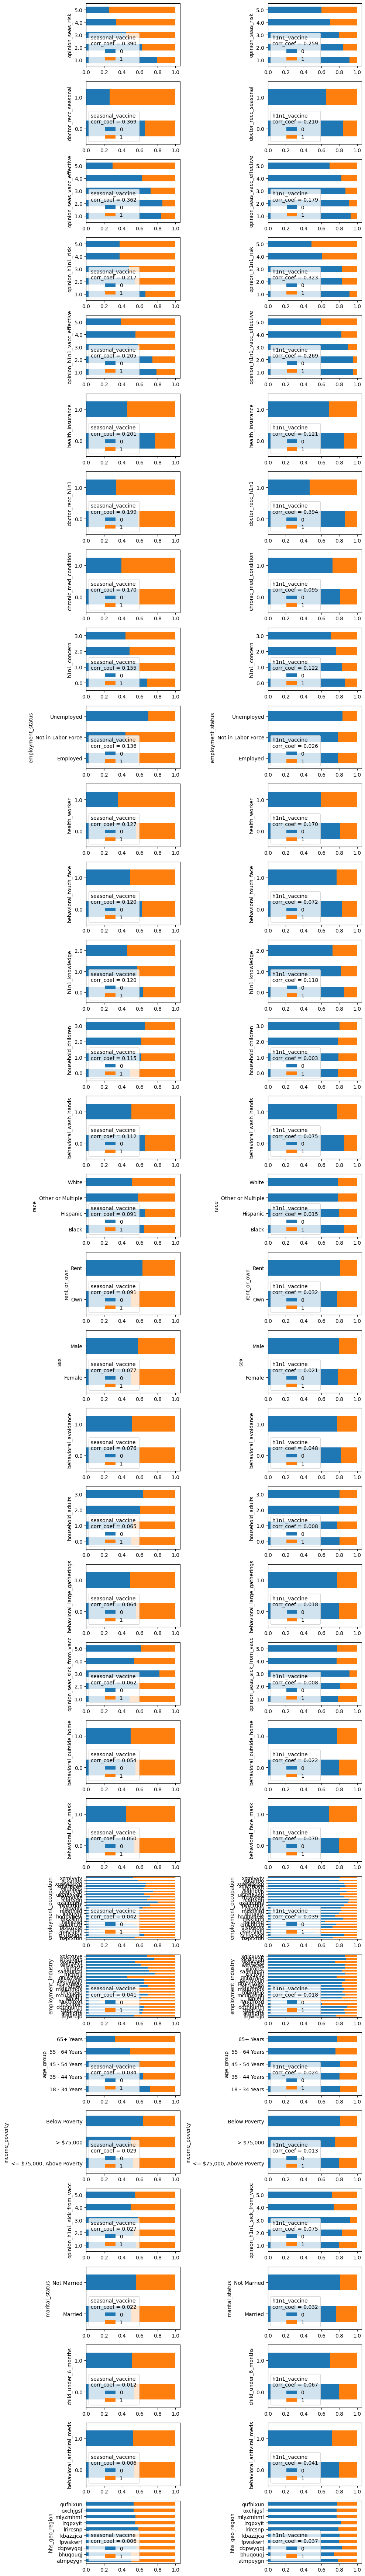

In [13]:
data = pd.merge(train_features, train_labels)
feature_cols = feature_importance(correlation_matrix,threshold=0.025)
feature_num = feature_cols.size
fig, axs = plt.subplots(feature_num, 2, figsize=(10, 70))
for i, feature in enumerate(feature_cols):
    for j, target in enumerate(target_cols):
        plot_barh(feature, target, data, ax=axs[i, j])
        axs[i,j].legend(loc='lower left',
                        title=f'{target} \ncorr_coef = {correlation_matrix.loc[feature,target]:.3f}')
plt.tight_layout()

Таким образом получаем список потенциально полезных предикторов

In [14]:
first_selection = feature_importance(correlation_matrix, threshold=0.025)

In [15]:
h1n1_exclude = ['household_children',
                'behavioral_large_gatherings',
                'race',
                'rent_or_own',
                'sex',
                'behavioral_large_gatherings',
                'opinion_seas_sick_from_vacc',
                'behavioral_outside_home',
                'opinion_h1n1_sick_from_vacc',
                'household_adults',
                'age_group', 
                'income_poverty',
                'hhs_geo_region']
h1n1_predictors = list(set(first_selection) - set(h1n1_exclude))
seas_exclude = ['opinion_seas_sick_from_vacc',
                'opinion_h1n1_sick_from_vacc',
                'income_poverty',
                'child_under_6_months',
                'behavioral_antiviral_meds',
                'hhs_geo_region']
seas_predictors = list(set(first_selection) - set(seas_exclude))

# Конструирование признаков
5. Разделите подмножество предикторов на категориальне и числовые. Проведите преобразование категориальных признаков с помощью `sklearn.preprocessing.OneHotEncoder` или других способов кодирования, если это необходимо.

`### Do not modify this cell`

Сначала обработаем пропуски в данных. Для этого посмотрим, в каких столбцах, необходимых для предсказаний, есть пропущенные значения

Далее код будет копироваться для аналогичного изменения признаков в тестовом датасете, для которого неизвестны лейблы

In [16]:
data[list(set(seas_predictors)|set(h1n1_predictors))].isna().sum()

doctor_recc_seasonal            2160
behavioral_wash_hands             42
health_worker                    804
behavioral_large_gatherings       87
opinion_h1n1_vacc_effective      391
health_insurance               12274
opinion_h1n1_risk                388
behavioral_face_mask              19
h1n1_knowledge                   116
behavioral_antiviral_meds         71
employment_industry            13330
behavioral_avoidance             208
marital_status                  1408
employment_occupation          13470
race                               0
doctor_recc_h1n1                2160
age_group                          0
behavioral_outside_home           82
sex                                0
chronic_med_condition            971
behavioral_touch_face            128
household_adults                 249
h1n1_concern                      92
opinion_seas_vacc_effective      462
opinion_seas_risk                514
employment_status               1463
child_under_6_months             820
h

In [17]:
data.shape

(26707, 38)

In [18]:
data.employment_industry.value_counts()

employment_industry
fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: count, dtype: int64

<Axes: >

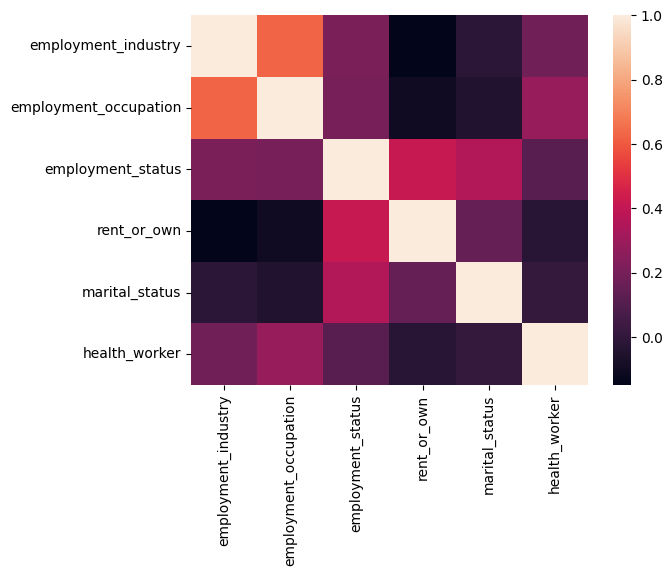

In [19]:
social_preds = ['employment_industry','employment_occupation', 'employment_status','rent_or_own',
                'marital_status', 'health_worker']
sns.heatmap(data_factorized[social_preds].corr())

In [20]:
pd.crosstab(data_factorized.fillna(-1)['employment_industry'], data_factorized.fillna(-1)['employment_occupation'])

employment_occupation,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
employment_industry,,,,,,,,,,,,,,,,,,,,,
0,13219,3,43,3,3,2,1,0,5,36,...,0,0,0,0,0,0,1,2,0,0
1,16,629,48,1,12,18,0,3,9,131,...,2,3,1,3,4,12,0,38,0,0
2,3,20,87,1,33,8,0,1,0,35,...,0,1,0,4,0,307,0,16,0,0
3,19,4,158,1178,32,3,1,0,30,108,...,6,6,4,18,4,31,17,18,0,0
4,1,16,40,1,125,4,2,3,6,60,...,2,33,0,1,6,1,0,10,0,0
5,7,21,159,1,8,24,32,470,0,42,...,0,6,1,0,38,0,1,20,3,0
6,19,12,196,2,6,7,150,4,209,109,...,0,1,168,3,5,0,68,2,0,0
7,0,97,64,0,3,1,1,5,0,21,...,0,0,3,0,2,1,0,0,0,0
8,4,4,124,0,1,5,0,2,2,20,...,0,1,0,4,0,0,14,6,92,0


Признаки 'employment_industry' и 'employment_occupation' скоррелированы, но у половины объектов отсутствуют значения по обоим признакам. Это категориальные признаки, возможные значения которых представлены наборами случайных букв. Я не вижу возможности по какому-либо принципу заполнить пропуски в этих признаках, не добавив ложные зависимости с целевыми переменными. Поэтому просто уберём эти признаки из предсказаний (они неочевидно коррелируют с целевыми переменными).

In [21]:
h1n1_predictors.remove('employment_industry')
seas_predictors.remove('employment_industry')
h1n1_predictors.remove('employment_occupation')
seas_predictors.remove('employment_occupation')

In [22]:
data.health_insurance.unique()

array([ 1., nan,  0.])

<Axes: >

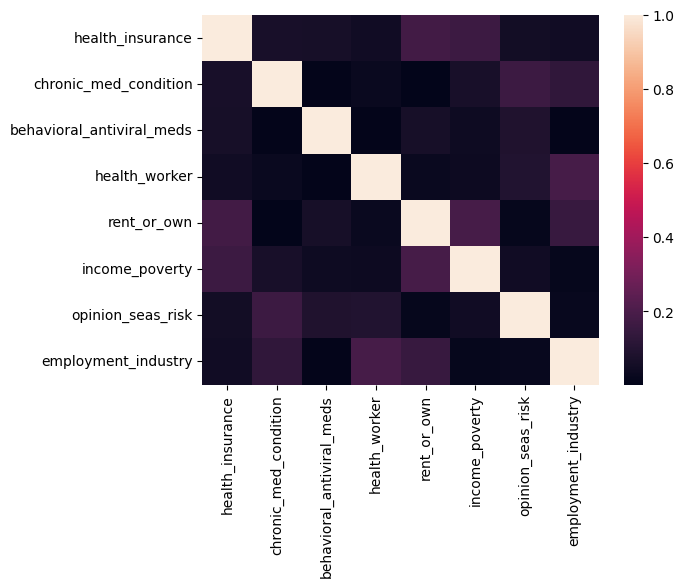

In [23]:
med_preds = ['health_insurance', 'chronic_med_condition', 
             'behavioral_antiviral_meds', 'health_worker', 
             'rent_or_own', 'income_poverty', 'opinion_seas_risk',
            'employment_industry']
sns.heatmap(np.abs(data_factorized[med_preds].corr()))

In [24]:
data.income_poverty.unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [25]:
pd.crosstab(data.fillna(-1)['health_insurance'], data.fillna(-1)['rent_or_own'])

rent_or_own,-1,Own,Rent
health_insurance,,,
-1.0,1627,8177,2470
0.0,64,857,815
1.0,351,9702,2644


In [26]:
pd.crosstab(data.fillna(-1)['health_insurance'], data.fillna(-1)['income_poverty'])

income_poverty,-1,"<= $75,000, Above Poverty","> $75,000",Below Poverty
health_insurance,,,,
-1.0,2682,5492,2988,1112
0.0,227,872,119,518
1.0,1514,6413,3703,1067


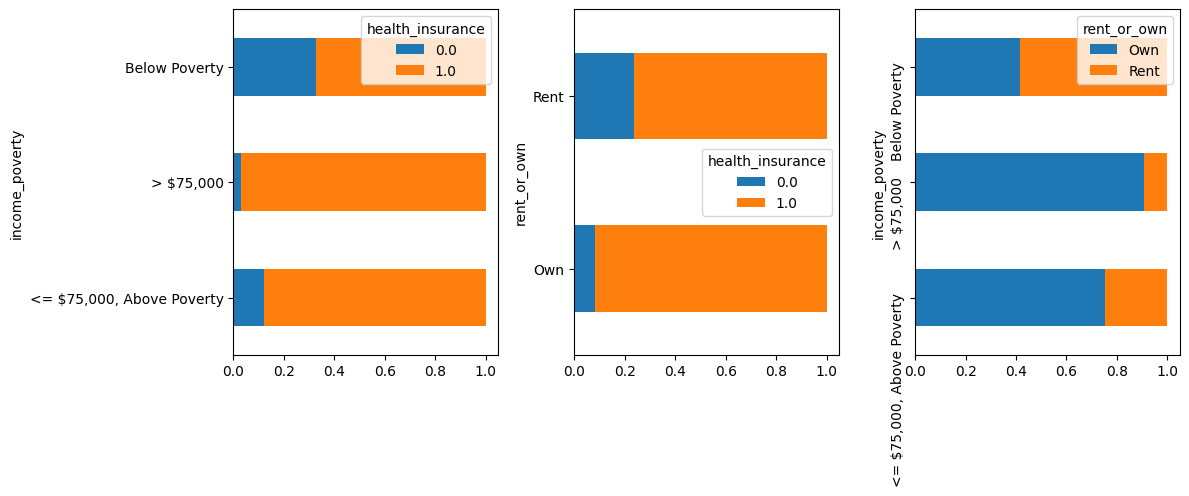

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(12,5))
plot_barh('income_poverty','health_insurance', data, axs[0])
plot_barh('rent_or_own', 'health_insurance', data, axs[1])
plot_barh('income_poverty', 'rent_or_own', data, axs[2])
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()

Будем использовать income poverty для заполнения пропусков по health insurance. Присвоим значения 0 или 1 в пропорции признака health insurance для соответствующей группы income poverty

In [28]:
props = plot_barh('income_poverty','health_insurance', data, axs[0])
test_props = plot_barh('income_poverty','health_insurance', test_features, axs[0])

In [29]:
#заполним пропуски наиболее часто встречающимся значением
data['income_poverty'] = data['income_poverty'].fillna(data['income_poverty'].mode()[0]) 
test_features['income_poverty'] = test_features['income_poverty'].fillna(test_features['income_poverty'].mode()[0]) 

In [30]:
data.income_poverty.isna().sum()

0

In [31]:
test_features.income_poverty.isna().sum()

0

In [32]:
def prop_fillna(vec, props):
    """
    функция для заполнения пропусков пропорционально другому признаку
    заполнение происходит на основе значений двух других признаков
    пропорция proprs вычисляется заранее

    """
    if not pd.isna(vec[0]):
        return vec[0]
    else:
        return np.random.choice([0, 1], p=[props.loc[vec[1], 0.0], 1 - props.loc[vec[1], 0.0]])
        
data['health_insurance'] = data[['health_insurance','income_poverty']].apply(prop_fillna, axis=1,
                                                                             props=props)
test_features['health_insurance'] = test_features[['health_insurance','income_poverty']].apply(prop_fillna,
                                                                                axis=1, props=test_props)

<Axes: >

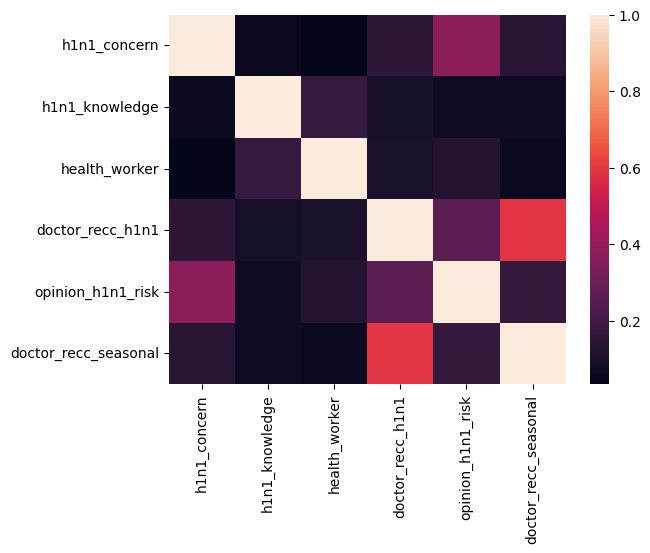

In [33]:
vaccine_concernings = ['h1n1_concern', 'h1n1_knowledge',
                            'health_worker', 'doctor_recc_h1n1',
                            'opinion_h1n1_risk', 'doctor_recc_seasonal']
sns.heatmap(np.abs(data_factorized[vaccine_concernings].corr()))

In [34]:
pd.crosstab(data.fillna(-1)['doctor_recc_h1n1'], data.fillna(-1)['doctor_recc_seasonal'])

doctor_recc_seasonal,-1.0,0.0,1.0
doctor_recc_h1n1,,,
-1.0,2160,0,0
0.0,0,15659,3480
1.0,0,794,4614


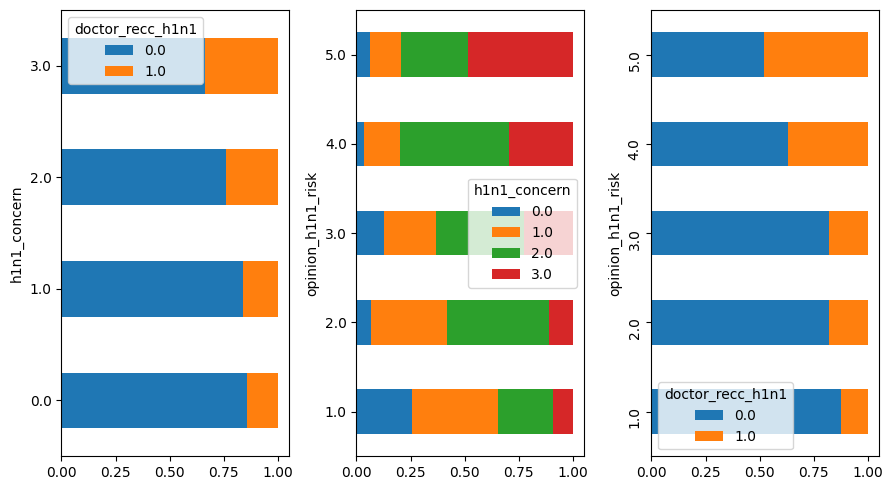

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(9,5))
plot_barh('h1n1_concern','doctor_recc_h1n1', data, axs[0])
plot_barh('opinion_h1n1_risk','h1n1_concern', data, axs[1])
plot_barh('opinion_h1n1_risk','doctor_recc_h1n1', data, axs[2])
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()

In [36]:
pd.crosstab(data_factorized.fillna(-1)['doctor_recc_h1n1'], data_factorized.fillna(-1)['h1n1_concern'])

h1n1_concern,-1.0,0.0,1.0,2.0,3.0
doctor_recc_h1n1,,,,,
-1.0,19,265,530,899,447
0.0,61,2594,6384,7349,2751
1.0,12,437,1239,2327,1393


Будем заполнять признак "doctor_recc_h1n1" пропорционально 'h1n1_concern'. (Аналогично 'income_poverty' и 'health_insurance'). При это NaN в h1n1_concern заполним наиболее встречающимся значением, поскольку в этом прознаке пропущенных данных гораздо меньше, чем в 'doctor_recc_h1n1'.

In [37]:
props = plot_barh('h1n1_concern','doctor_recc_h1n1', data, axs[0])
test_props = plot_barh('h1n1_concern','doctor_recc_h1n1', test_features, axs[0])

In [38]:
data['h1n1_concern'] = data['h1n1_concern'].fillna(data['h1n1_concern'].mode()[0]) 
test_features['h1n1_concern'] = test_features['h1n1_concern'].fillna(test_features['h1n1_concern'].mode()[0]) 

In [39]:
data.opinion_h1n1_risk.isna().sum()

388

In [40]:
#используем уже готовую функцию prop_fillna
data['doctor_recc_h1n1'] = data[['doctor_recc_h1n1','h1n1_concern']].apply(prop_fillna, axis=1,
                                                                           props=props)
test_features['doctor_recc_h1n1'] = test_features[['doctor_recc_h1n1','h1n1_concern']].apply(prop_fillna,
                                                                                        axis=1,
                                                                                        props=test_props)

Таким же образом по признаку doctor_recc_h1n1 заполним пропуски в doctor_recc_seasonal

In [41]:
props = plot_barh('doctor_recc_h1n1','doctor_recc_seasonal', data, axs[0])
data['doctor_recc_seasonal'] = data[['doctor_recc_seasonal','doctor_recc_h1n1']].apply(prop_fillna,
                                                                                       axis=1,
                                                                                      props=props)

In [42]:
test_props = plot_barh('doctor_recc_h1n1','doctor_recc_seasonal', test_features, axs[0])
test_features['doctor_recc_seasonal'] = test_features[['doctor_recc_seasonal','doctor_recc_h1n1']].apply(prop_fillna,
                                                                                            axis=1,
                                                                                    props=test_props)

Аналогично заполним пропуски в rent or own по income poverty

In [43]:
data.rent_or_own.unique()

array(['Own', 'Rent', nan], dtype=object)

In [44]:
props

doctor_recc_seasonal,0.0,1.0
doctor_recc_h1n1,,
0.0,0.818172,0.181828
1.0,0.146820,0.853180


In [45]:
props = plot_barh('income_poverty','rent_or_own', data, axs[0])
test_props = plot_barh('income_poverty','rent_or_own', test_features, axs[0])

def prop_fillna(vec, props):
    if not pd.isna(vec[0]):
        return vec[0]
    else:
        return np.random.choice(['Own', 'Rent'], p=[props.loc[vec[1], 'Own'], 1 - props.loc[vec[1], 'Own']])

data['rent_or_own'] = data[['rent_or_own','income_poverty']].apply(prop_fillna, axis=1, props=props)
test_features['rent_or_own'] = test_features[['rent_or_own','income_poverty']].apply(prop_fillna,
                                                                    axis=1, props=test_props)

Остальные колонки заполним наиболее встречающимися значениями

In [46]:
data = data.fillna(data.mode().iloc[0])
data.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [47]:
test_features = test_features.fillna(test_features.mode().iloc[0])
test_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

Перейдём к кодированию категориальных признаков

In [48]:
X = data[list(set(seas_predictors)|set(h1n1_predictors))]
X_test = test_features[list(set(seas_predictors)|set(h1n1_predictors))] #сразу же кодируем тестовый датасет

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
numeric_data = X.select_dtypes(['float64', 'int64'])

In [51]:
two_unique_value_cols = ['sex', 'marital_status', 'rent_or_own']
X[two_unique_value_cols] = X[two_unique_value_cols].apply(lambda x: pd.factorize(x)[0])
X_test[two_unique_value_cols] = X_test[two_unique_value_cols].apply(lambda x: pd.factorize(x)[0])

C:\Users\79872\AppData\Local\Temp\ipykernel_12200\1258450060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[two_unique_value_cols] = X[two_unique_value_cols].apply(lambda x: pd.factorize(x)[0])
C:\Users\79872\AppData\Local\Temp\ipykernel_12200\1258450060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[two_unique_value_cols] = X_test[two_unique_value_cols].apply(lambda x: pd.factorize(x)[0])


In [52]:
X_h1n1 = X[h1n1_predictors]
X_seas = X[seas_predictors]
X_final_test_h1n1 = X_test[h1n1_predictors]
X_final_test_seas = X_test[seas_predictors]

In [53]:
def encoding(df):
    cat_columns=df.select_dtypes(['object']).columns
    cols_to_encode = list(set(cat_columns)-set(two_unique_value_cols))
    encoder = OneHotEncoder()
    encoder_df = pd.DataFrame(encoder.fit_transform(df[cols_to_encode]).toarray())
    df = df.join(encoder_df)
    df.drop(cols_to_encode, axis= 1 , inplace= True )   
    return df

In [54]:
X_h1n1 = encoding(X_h1n1)
X_seas = encoding(X_seas)
X_final_test_h1n1 = encoding(X_final_test_h1n1)
X_final_test_seas = encoding(X_final_test_seas)

In [55]:
len(h1n1_predictors)

19

In [58]:
len(seas_predictors)

25

# Бэйзлайн и продвинутые модели
6. Построение модели:
    - В качестве метрики используйте `sklearn.metrics.roc_auc_score`. (Дополнительно можете строить ROC-кривые).
    - Точность модели оцените по кросс-валидации га тренировочной выборке (можно разбивать на 5 частей) + на отложенной тестовой выборке.
    - С точки зрения площади под ROC-кривой, сравните качества:
        - Бэйзлайн модели - логистической регрессии или любого другого простого классификатора.
        - Случайного леса, обученного на предобработанном подмножестве признаков
        - Градиентного бустинга из одной (на выбор) библиотек -- [CatBoost](https://catboost.ai/), [XGBoost](https://xgboost.readthedocs.io/en/stable/),  [LightGBM](https://lightgbm.readthedocs.io/en/v3.3.2/Python-Intro.html). *Я советую начать с библиотеки Catboost --  у них хороший выбор параметров по умолчанию
        
7. Сделайте тюнинг гиперпараметров вашего алгоритма (с помощью `optuna` или любого другого фреймворка дискретной оптимизации). 

`### Do not modify this cell`

In [56]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from hyperopt.pyll import scope
from functools import partial
import xgboost as xgb
from sklearn.decomposition import PCA

In [57]:
y_h1n1 = data['h1n1_vaccine']
y_seas = data['seasonal_vaccine']

In [60]:
X_h1n1.columns = X_h1n1.columns.astype(str)
X_seas.columns = X_seas.columns.astype(str)
X_final_test_h1n1.columns = X_final_test_h1n1.columns.astype(str)
X_final_test_seas.columns = X_final_test_seas.columns.astype(str)

In [127]:
_X_h1n1, X_h1n1_test, _y_h1n1, y_h1n1_test = train_test_split(X_h1n1, y_h1n1, test_size=0.2, random_state=42)
_X_seas, X_seas_test,_y_seas, y_seas_test = train_test_split(X_seas, y_seas, test_size=0.2, random_state=42)

Попробуем отобрать самые полезные предикторы с помощью PCA. В дальнейшем будем пробовать обучать на ограниченном наборе параметров и смотреть, улучшилась ли точность

In [141]:
def feature_selection(n_best_features, X, y):
    """
    Выводится список из признаков, упорядоченных по их вкладу в новые компоненты PCA
    - от большего вклада к меньшему
    
    """
    n_components = n_best_features
    pca = PCA(n_components=n_components)
    pca.fit(X, y)
    X_transformed = pca.transform(X)
    
     #получим датафрейм, который описывает проекции новых компонент на первоначальные признаки
    df = pd.DataFrame()
    components = np.abs(pca.components_.T)
    for c in range(len(components)):
        df[X.columns[c]] = components[c]


    trustedFeatures = []
    for i in range(n_components):
        trustedFeatures.append(df.apply(max, axis=0).idxmax())
        df = df.drop(df.apply(max, axis=0).idxmax(), axis=1)
    return trustedFeatures

In [268]:
trustedFeatures =  feature_selection(n_best_features=17, X=_X_seas, y=_y_seas)
trustedFeatures

['10',
 'sex',
 'doctor_recc_seasonal',
 '3',
 'h1n1_knowledge',
 'household_children',
 'household_adults',
 'opinion_seas_risk',
 'chronic_med_condition',
 'opinion_seas_vacc_effective',
 'h1n1_concern',
 'opinion_h1n1_risk',
 'doctor_recc_h1n1',
 '9',
 'opinion_h1n1_vacc_effective',
 'behavioral_large_gatherings',
 'behavioral_outside_home']

## Логистическая регрессия

In [320]:
logreg = LogisticRegression(max_iter=15000)

In [321]:
roc_auc = cross_val_score(logreg, _X_seas, _y_seas, cv=5, error_score='raise',
                          scoring='roc_auc')
roc_auc.mean()

ValueError: could not convert string to float: '65+ Years'

In [ ]:
lr_search_space = {
                'penalty' : hp.choice(label='penalty', 
                          options=[None, 'l2']),
                'C' : hp.loguniform(label='C', 
                        low=-3*np.log(10), 
                        high=2*np.log(10))
}

In [ ]:
#гиперпараметры h1n1
logreg = LogisticRegression(max_iter=15000, C=41.09966222770708) 

In [ ]:
best

In [ ]:
#гиперпараметры seasonal
logreg = LogisticRegression(max_iter=15000, C=0.08774009769447914, penalty='l2') 

In [ ]:
#проверка на переобучение
logreg.fit(_X_seas[trustedFeatures], _y_seas)
y_pred = logreg.predict_proba(X_seas_test[trustedFeatures])[:,1]
roc_auc_score(y_h1n1_test, y_pred) 

Модель логистической регрессии пир предсказании seasonal vaccine переобучается (точность падает на тесте). Сокращение признаков не спасает ситуацию

In [ ]:
def objective(params, model,  X_train, y_train):
    # задаём модели требуемые параметры    
    model.set_params(**params)

    # проводим кросс-валидацию  
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc', error_score='raise',
                            fit_params={'cat_features':list(cat_columns)}
                           )

    # возвращаем результаты, которые записываются в Trials()
    return   {'loss': -score.mean(), 'params': params, 'status': STATUS_OK}

## Случайный лес

In [ ]:
RandFor = RandomForestClassifier()

In [ ]:
roc_auc = cross_val_score(RandFor, _X_seas[trustedFeatures], _y_seas, cv=5, scoring='roc_auc',)
roc_auc.mean()

In [ ]:
RandFor_search_space = {
                'n_estimators': scope.int(hp.quniform('n_estimators',3, 500, 1)),  
                #'criterion': hp.choice(label='criterion', 
                #          options=['gini', 'entropy', 'log_loss']),
                'max_depth': scope.int(hp.quniform(label='max_depth', 
                        low=3, 
                        high=200, q=1)),
                'min_samples_split': scope.int(hp.quniform(label='min_samples_split', 
                        low=2, 
                        high=6, q=1)), 
                'min_samples_leaf': scope.int(hp.quniform(label='min_samples_leaf', 
                        low=1, 
                        high=5, q=1)),
}

In [ ]:
best

In [ ]:
#h1n1 classification
RandFor = RandomForestClassifier(n_estimators=241, 
                                 min_samples_leaf=4, min_samples_split=2, max_depth=10)

In [ ]:
RandFor = RandomForestClassifier(n_estimators=274, 
                                 min_samples_leaf=5, min_samples_split=3, max_depth=12)

In [ ]:
RandFor.fit(_X_seas, _y_seas)
y_pred = RandFor.predict_proba(X_seas_test)[:,1]
roc_auc_score(y_seas_test, y_pred)

## XGB

In [ ]:
xgb_model = xgb.XGBClassifier(tree_method="hist")
roc_auc = cross_val_score(xgb_model, _X_seas, _y_seas, cv=5, scoring='roc_auc',)
roc_auc.mean()

In [ ]:
best

In [ ]:
XGB_search_space = {
                'n_estimators': scope.int(hp.quniform('n_estimators',3, 500, 1)),  
                'max_depth': scope.int(hp.quniform(label='max_depth', 
                        low=3, 
                        high=200, q=1)),
                'learning_rate': hp.uniform('learning_rate', 0.01, 0.1), 
}

In [ ]:
#h1n1 classification
xgb_model = xgb.XGBClassifier(tree_method="hist",   
                             n_estimators=89,
                             max_depth=3,
                             learning_rate=0.058341102601098836)   

In [ ]:
#seasonal classification
xgb_model = xgb.XGBClassifier(tree_method="hist",   
                             n_estimators=76,
                             max_depth=5,
                             learning_rate=0.07259905145632177)  

In [ ]:
# ещё один хороший набор гиперпараметров
# xgb_model = xgb.XGBClassifier(tree_method="hist",   
#                              n_estimators=199,
#                              max_depth=4,
#                              learning_rate=0.07176141594071159)  

In [ ]:
roc_auc = cross_val_score(xgb_model, _X_seas, _y_seas, cv=5, scoring='roc_auc',)
roc_auc.mean()

In [ ]:
xgb_model.fit(_X_seas, _y_seas)
y_pred = xgb_model.predict_proba(X_seas_test)[:,1]
roc_auc_score(y_seas_test, y_pred)

## CatBoost 
- будем использовать некодированные категориальные переменные

In [ ]:
X_h1n1 = X[h1n1_predictors]
cat_columns=X_h1n1.select_dtypes(['object']).columns

In [ ]:
X_seas = X[seas_predictors]
cat_columns=X_seas.select_dtypes(['object']).columns

In [ ]:
_X_seas.columns

In [ ]:
list(cat_columns)

In [ ]:
_X_h1n1, X_h1n1_test, _y_h1n1, y_h1n1_test = train_test_split(X_h1n1, y_h1n1, test_size=0.2,
                                                              random_state=42, shuffle=True)
_X_seas, X_seas_test,_y_seas, y_seas_test = train_test_split(X_seas, y_seas, test_size=0.2,
                                                             random_state=42, shuffle=True)

In [ ]:
model = CatBoostClassifier(silent=True)

In [ ]:
roc_auc = cross_val_score(model, _X_seas, _y_seas, cv=5, scoring='roc_auc', 
                          fit_params={'cat_features':list(cat_columns)},
                          error_score='raise')
roc_auc.mean()

In [ ]:
CatBoost_search_space = {
                #'iterations': hp.quniform('n_estimators',3, 250, 1),  
                'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
                'depth':hp.randint('depth', 3, 10),
                'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
                #'boosting_type': hp.choice('boosting_type', ['Ordered', 'Plain']),
                'subsample':hp.uniform('subsample', 0.05, 1),
                #'colsample_bylevel':hp.uniform('colsample_bylevel', 0.05, 1),
                'min_data_in_leaf':hp.randint('min_data_in_leaf', 1, 100),

}

In [ ]:
#h1n1 classifier
model = CatBoostClassifier(silent=True, 
                           depth=3,
                           l2_leaf_reg=4.1150674,
                           learning_rate=0.03586,
                           min_data_in_leaf=52,
                           subsample=0.5277585)

In [ ]:
# запускаем hyperopt
trials = Trials()
best = fmin( 
          # функция для оптимизации  
            fn=partial(objective, model=model, X_train=_X_seas, 
                       y_train=_y_seas,
                      ),
          # пространство поиска гиперпараметров  
            space=CatBoost_search_space,
          # алгоритм поиска
            algo=tpe.suggest,
          # число итераций 
          # (можно ещё указать и время поиска) 
            max_evals=10,
          # куда сохранять историю поиска
            trials=trials,
          # random state
            rstate=np.random.default_rng(seed=42),
          # progressbar
            show_progressbar=True
        )

In [ ]:
#seas classifier
model = CatBoostClassifier(silent=True, 
                           depth=4,
                           l2_leaf_reg=7.34014014647542,
                           learning_rate=0.06332080719932268,
                           min_data_in_leaf=14,
                           subsample=0.4335887867488802)

In [ ]:
model.fit(_X_seas, _y_seas, cat_features=list(cat_columns))
y_pred = model.predict_proba(X_seas_test)[:,1]
roc_auc_score(y_seas_test, y_pred)

В следующих двух ячейках происходил подбор гиперпараметров для всех моделей

In [ ]:
best

Создадим таблицу pandas, в которую внесём все получившиеся точности. Будем записывать те точности, которые получались на тестовой выборке

In [ ]:
{'Логистическая регрессия': [0.8265, 0],
'Случайный лес': [0.83136, 0],
'XGBoost':[0.83051, 0],
'CatBoost':[0.81679, 0]}

In [ ]:
results = pd.DataFrame({'Логистическая регрессия': [0.8265, 0.7],
                        'Случайный лес': [0.83136, 0.83577],
                        'XGBoost':[0.83051, 0.85089],
                        'CatBoost':[0.81679, 0.85178]},                        
                       index=['h1n1', 'seasonal'])

In [ ]:
results

Для классификации на тестовой выборке выбираем Random Forest для h1n1 и CatBoost для seasonal

# Предсказания на тестовой выборке и сабмит в систему

8. Сделайте предсказание на тестовой части выборки (для которой истинные значения лейблов неизвестны) и отправьте своё решение на DrivenData.org. Добавьте в ноутбук с заданием получающийся скриншот. 

Задание считается полностью засчитанным, если вы сделали сабмит в систему!

`### Do not modify this cell`

In [62]:
#h1n1 classification
RandFor = RandomForestClassifier(n_estimators=241, 
                                 min_samples_leaf=4, min_samples_split=2, max_depth=10)

In [63]:
RandFor.fit(X_h1n1, y_h1n1)
y_h1n1_proba = RandFor.predict_proba(X_final_test_h1n1)[:,1]

In [64]:
y_h1n1_proba

array([0.14689723, 0.03330314, 0.33522805, ..., 0.11324867, 0.08367138,
       0.49395409])

In [65]:
#seas classifier
model = CatBoostClassifier(silent=True, 
                           depth=4,
                           l2_leaf_reg=7.34014014647542,
                           learning_rate=0.06332080719932268,
                           min_data_in_leaf=14,
                           subsample=0.4335887867488802)

In [66]:
#категориальные признаки должны быть некодированными
X_seas = X[seas_predictors]
X_final_test_seas = X_test[seas_predictors]
cat_columns=X_final_test_seas.select_dtypes(['object']).columns

In [67]:
model.fit(X_seas, y_seas, cat_features=list(cat_columns))
y_seas_proba = model.predict_proba(X_final_test_seas)[:,1]

In [83]:
y_seas_proba

array([0.17437586, 0.03976421, 0.8139408 , ..., 0.13886593, 0.24687897,
       0.68453878])

In [69]:
submission_path = 'submission_format.csv'

submission = pd.read_csv(submission_path)
submission['h1n1_vaccine'] = y_h1n1_proba
submission['seasonal_vaccine'] = y_seas_proba
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.146897,0.177712
1,26708,0.033303,0.031406
2,26709,0.335228,0.697015
3,26710,0.572123,0.876075
4,26711,0.319373,0.493042
...,...,...,...
26703,53410,0.309182,0.374957
26704,53411,0.153328,0.434375
26705,53412,0.113249,0.165817
26706,53413,0.083671,0.277471


In [70]:
submission.to_csv('submission_1.csv', index=False)